<a href="https://colab.research.google.com/github/estefyfb/Machine-Learning-Projects-2018/blob/master/1_EDA_DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Assignment 1 Option 1: Table Data

Group Members:  Christina DeSantiago, Estefy Fiallos, Kaiying Li, Tianyu Li

# 1. Business understanding

For this lab, we chose to analyze the Ames housing data set. This set was created by professor Dean De Cook, as an alternative to the very popular Boston housing data set, as a tool for learning data analysis techniques. The data comes from the Ames City Assesor's Office, detailing the residential property sales that occurred in Ames, Iowa between 2006 and 2010. This set could be used to predict sales price from various attributes of the property (# of bedrooms, square footage, year built, etc). Predicting sales price is something that both buyers and sellers would be interested in. 

For the buyers, it will be convenient for them to narrow down the house choices within their budget range by selecting the number of bedrooms and bathrooms, garage types and other features when they are in the house market.On the other hand, for sellers such as real estate or construction company, it is crucial to understand which type of houses or floor plan are more desirable in the market. Predicting the sales prices of different type of houses not only helps them optimize their asset acquisition or construction plan, it also leads to quicker asset turn over and smooth sales process. Ultimately a greater profit is achieved.

Zillow is an example of a real estate company that is interested in modeling future sales price. Zillow has even participated in hosting a Kaggle competition with the goal of improving their algorithms for "Zestimates" and sales price. To be useful for sellers like Zillow, we would need to perform cross validation techniques to assess our prediction model for sales price. To begin, we will need to break the Ames Housing data set into two subsets: a "Training" and "Test" set. The data will be split randomly with 75% of the observations in the Training set and 25% in the Test set. We would then use the Training set to build a prediction model for sales price. Using this model, we will generate the predicted sales price for the data in our Test set and evalutate performance based on MSPE (Mean Squared Prediction Error). 

MSPE is a measure for the difference between the predicted value and the actual values. We would want our model to have a lower value for MSPE, meaning our predicted sales price for all observations are close to the actual sale price. Of course, the first model we develop may not be the "best" so we should build other models as well and compare the MSPE for all our prediction models. The model we bring to sellers will have the lowest MSPE, giving the sellers an idea of what a house with certain attributes can be expected to sell for .


**Sources**: for description of data :  http://ww2.amstat.org/publications/jse/v19n3/decock.pdf

for data documentation: https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt

# 2. Data understanding


##2.1 Load the Dataset and Define Datatype

The Ames housing data set has a total of 82 variables: 20 continuous, 14 discrete, 46 categorical, and 2 identifier/ordering variables. Since there is a large number of variables, we will only focus on the following subset of attributes: Gr Liv Area = Above ground living area (continuous), SalePrice = Sales price in dollars (continuous), Year built (discrete), Full Bath = number of full bathrooms (discrete), Bedroom AbvGr = number of bedrooms above ground (discrete), Garage Type (nominal), Lot frontage (continuous)


In [0]:
#we import the dataset from the source given above
import pandas as pd
df2=pd.read_csv("https://github.com/skytianyuli/MLPython/blob/master/AmesHousing%20-%20AmesHousing.tsv")
df2.head()

In [0]:
#we import the dataset from the source given above
import pandas as pd
df2=pd.read_csv("https://github.com/skytianyuli/MLPython/blob/master/ames.csv", sep="\t")
df2.head()

#make a subset of the dataset only with the variables we are interested in
to_keep=['Lot Frontage','Lot Area','Year Built', 'Gr Liv Area','Full Bath', 'Bedroom AbvGr','Garage Type', 'SalePrice']
sub = df2[to_keep].copy()

#check the data types and missing values
sub.info()

Since we defined 'Lot Area',  'Gr Liv Area', and 'Sale Price', as continuous variables, we are going to change the data type of these attributes from int64 to float64. We turned the data type of 'Garage Type' into one hot encoding as well.


In [0]:
import numpy as np
#change continuous features from int to float data types
continuous_features=['SalePrice','Lot Area', 'Gr Liv Area']
sub[continuous_features]=sub[continuous_features].astype(np.float64)

In [0]:
#Change NA values in 'Garage Type' to No_Garage (since NA is described as no garage in data documentation)
sub['Garage Type'].fillna(value='No_Garage', inplace= True)
sub.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 8 columns):
Lot Frontage     2440 non-null float64
Lot Area         2930 non-null float64
Year Built       2930 non-null int64
Gr Liv Area      2930 non-null float64
Full Bath        2930 non-null int64
Bedroom AbvGr    2930 non-null int64
Garage Type      2930 non-null object
SalePrice        2930 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 183.2+ KB


In [0]:

#one hot encoding for the Garage Type variable
tmp = pd.get_dummies(sub['Garage Type'])
result = pd.concat([sub, tmp],axis=1, join_axes=[sub.index])
result.head()


,Lot Frontage,Lot Area,Year Built,Gr Liv Area,Full Bath,Bedroom AbvGr,Garage Type,SalePrice,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,No_Garage
0,141.0,31770.0,1960,1656.0,1,3,Attchd,215000.0,0,1,0,0,0,0,0
1,80.0,11622.0,1961,896.0,1,2,Attchd,105000.0,0,1,0,0,0,0,0
2,81.0,14267.0,1958,1329.0,1,3,Attchd,172000.0,0,1,0,0,0,0,0
3,93.0,11160.0,1968,2110.0,2,3,Attchd,244000.0,0,1,0,0,0,0,0
4,74.0,13830.0,1997,1629.0,2,3,Attchd,189900.0,0,1,0,0,0,0,0


The output below summarizes the variables we selected now adjusted with 
their correct data types.

In [0]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 15 columns):
Lot Frontage     2440 non-null float64
Lot Area         2930 non-null float64
Year Built       2930 non-null int64
Gr Liv Area      2930 non-null float64
Full Bath        2930 non-null int64
Bedroom AbvGr    2930 non-null int64
Garage Type      2930 non-null object
SalePrice        2930 non-null float64
2Types           2930 non-null uint8
Attchd           2930 non-null uint8
Basment          2930 non-null uint8
BuiltIn          2930 non-null uint8
CarPort          2930 non-null uint8
Detchd           2930 non-null uint8
No_Garage        2930 non-null uint8
dtypes: float64(4), int64(3), object(1), uint8(7)
memory usage: 203.2+ KB


##2.2 Verify data quality

The visualization below indicates that there are missing values in our data set for the Lot Frontage variable. Originally, Garage Type had values of "NA" for 157 observations, but these were not actual missing values. The data documentation explains that "NA" is used to indicate a property without a garage, so we changed those values before the one hot encoding. Lot Frontage has 490 observations with blanks, which are true missing values. We believe these are true missing values because they are blank rather than 0 or NA, which were used in other columns of the data. To deal with these missing values, we used imputation.

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 


!pip install missingno
import missingno as mn

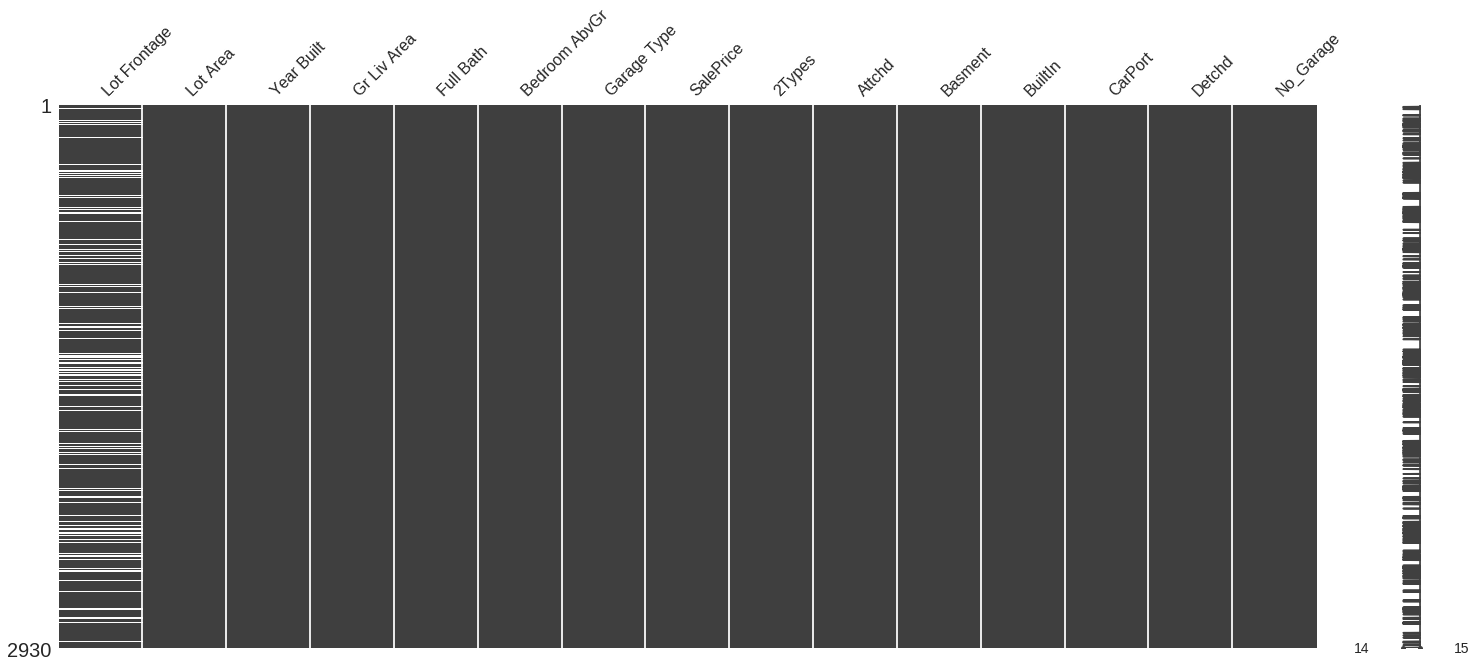

In [0]:
#visualize missing data in our data set
mn.matrix(result)

In [0]:
#needed for visualizations
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels
import textwrap

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


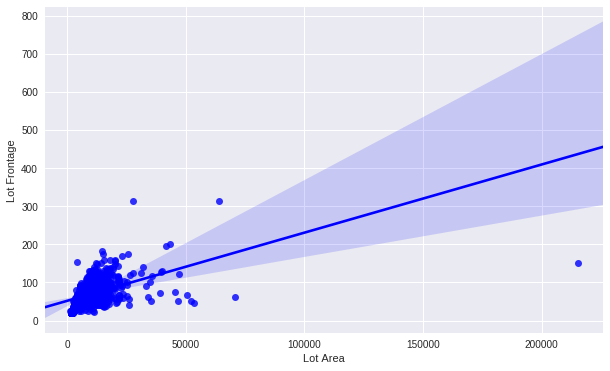

In [0]:
#visualize relationship between Lot Frontage and Lot Area
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
sns.regplot(x="Lot Area", y="Lot Frontage", data=sub,color="blue")

We decided to use the Lot Area to predict Lot Frontage missing values. We hypothesized that larger lots would tend to have more lot frontage, and the scatter plot above appears to show a correlation. First, we broke down 'Lot Area' into intervals: 0-10000, 10001-20000, 20001-30000, and over 30000. The last interval was chosen because there are not enough observations with Lot Area over 30000 to break up into smaller intervals, and we decided it would provide an acceptable estimate for this group. We then imputed the missing values in 'Lot frontage' with the mean within each group defined by the Lot Area intervals. 

In [0]:
#Breaking up 'Lot Area' into intervals
result['Lot_Area_Ranges']= pd.cut(result['Lot Area'], [0, 10000, 20000, 30000, 250000])

result_grouped = result.groupby(by=['Lot_Area_Ranges'])

#Fill missing values with mean within 'Lot Area' intervals
func = lambda grp: grp.fillna(grp.mean())
result_imputed = result_grouped.transform(func)

# fill any deleted columns
col_deleted = list( set(result.columns) - set(result_imputed.columns)) # in case the mean operation deleted columns
result_imputed[col_deleted] = result[col_deleted]

result_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 16 columns):
Lot Frontage       2930 non-null float64
Lot Area           2930 non-null float64
Year Built         2930 non-null int64
Gr Liv Area        2930 non-null float64
Full Bath          2930 non-null int64
Bedroom AbvGr      2930 non-null int64
SalePrice          2930 non-null float64
2Types             2930 non-null uint8
Attchd             2930 non-null uint8
Basment            2930 non-null uint8
BuiltIn            2930 non-null uint8
CarPort            2930 non-null uint8
Detchd             2930 non-null uint8
No_Garage          2930 non-null uint8
Lot_Area_Ranges    2930 non-null category
Garage Type        2930 non-null object
dtypes: category(1), float64(4), int64(3), object(1), uint8(7)
memory usage: 206.2+ KB


We now have our final data set "result_imputed" which we use to start exploring visualizations.

# 3. Visualizations 

## 3.1 Visualize attribute distributions - Single

**Living Area Distribution**



count    2930.000000
mean     1499.690444
std       505.508887
min       334.000000
25%      1126.000000
50%      1442.000000
75%      1742.750000
max      5642.000000
Name: Gr Liv Area, dtype: float64

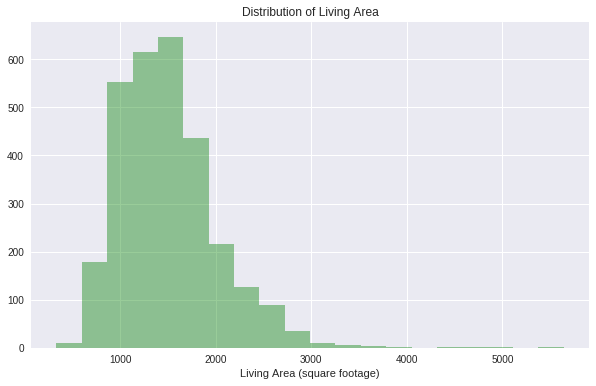

In [0]:
# visualize Living Area with histogram
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
ax=sns.distplot(result["Gr Liv Area"], kde=False, bins=20,color="green",axlabel="Living Area (square footage)")
plt.title("Distribution of Living Area")

#get descriptive statistics for Living Area
sub["Gr Liv Area"].describe()

By looking at the histogram of Living Area (in square footage), we see that the distribution is highly skewed right and unimodal. The median for the properties sold in Ames is 1,442 square feet. Using the rule of 1.5* IQR to detect outliers, we see that there are quite a few outliers in this data set. The maximum threshold is 2,666 square feet (924 + 1742) yet there are still some properties with a greater square footage. Knowing the distribution of Living Area is relevant for sellers like Zillow because this gives insight on what the housing market looks like. If the size of houses can be used to predict the sales price, sellers could use this to estimate potential revenue.

**Garage Type distribution**



Text(0.5,1,'Distribution of Garage Type')

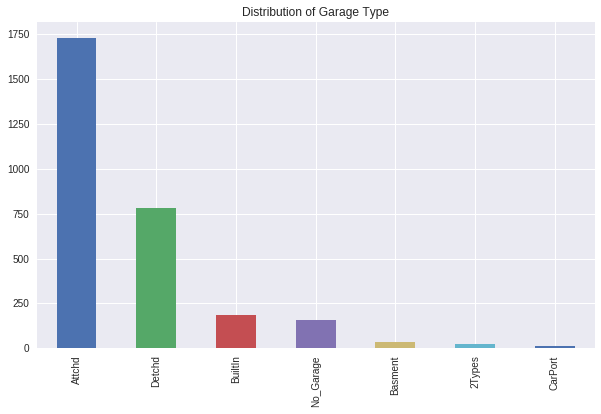

In [0]:
#visualize Garage Type with bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
result_imputed['Garage Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Garage Type')



The graph above shows that most houses have an attached garage, and about half as many houses have detached garages. The other type of garages represents a small percentage of homes. Sellers could use the this knowledge of the distribution to push sales of properties with attached and detached garages since these are the most common in the market.

**Full Bath distribution**



In [0]:
#Visualize the 'Full Bath' attribute
sizes = result_imputed['Full Bath'].value_counts()
sizes

2    1532
1    1318
3      64
0      12
4       4
Name: Full Bath, dtype: int64

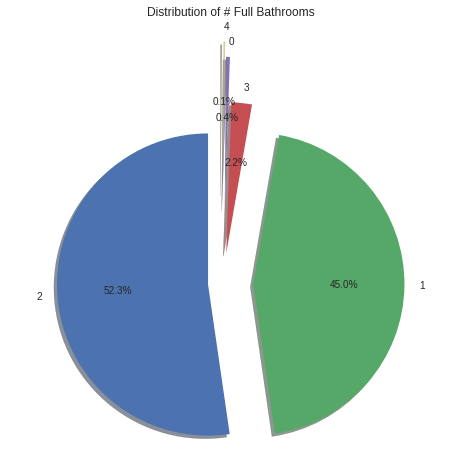

In [0]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = ['2','1','3','0','4']
sizes = result_imputed['Full Bath'].value_counts()
explode = [0.1,0.2,0.2,0.5,0.6]
# Plot
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle = 90, shadow = True, explode=explode)
 
plt.title("Distribution of # Full Bathrooms")
plt.axis('equal')
plt.show()

### source for pie chart: 
### https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

The pie chart above shows that 52.3% of houses had 2 full bathrooms, and 45% had 1 bathroom. Very few houses had 0, 3, or 4 bathrooms. Understanding the distributions of bathrooms is relevant for sellers because this could contribute to how they set their asking prices. Since properties with 3 or 4 bathrooms are quite rare, this could justify having higher sales prices for these kinds of properties.

**Sales Price distribution**




count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64


Text(0.5,1,'Distribution of SalePrice')

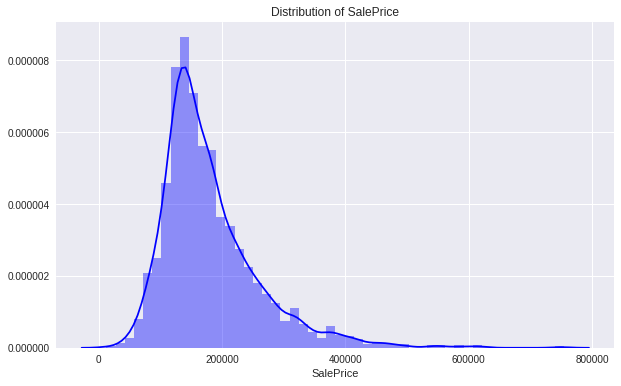

In [0]:
print(result_imputed['SalePrice'].describe())

import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(10,6))
sns.distplot(result_imputed.SalePrice,color="blue")
plt.title('Distribution of SalePrice')



The mean house sales price is about 180,800 dollars. The distribution of sales price is right-skewed. The upper threshold for outliers using the 1.5 * (IQR) rule is 339,500 dollars. Even so, there were still some properties that sold for more than this amount. Sellers like Zillow would be very interested in knowing the distribution of previous sales prices as a kind of guide for how they can set current asking prices. They can use the historical amounts as a way to gauge how much buyers are likely to spend and even see how much higher they can push the prices.

**Year Built Distribution**



[1860, 2015, 0, 700]

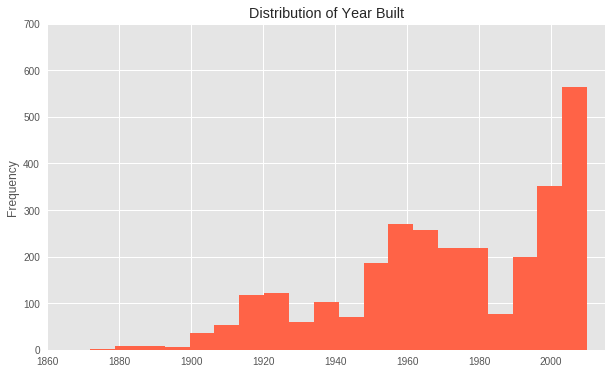

In [0]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(10,6))
result_imputed['Year Built'].plot.hist(bins=20,color="tomato")
plt.title('Distribution of Year Built')
plt.axis([1860,2015, 0, 700])

The distribution of Year Built is multimodal. For the houses sold in Ames from 2006 to 2010, these properties were built over a span of 138 years: with the oldest house built in 1872 and the newest house built in 2010.  There is a rapid growth of the frequency of houses built after the 1990s. Sellers would want to know the distribution of years built again to get a better understanding of the market. Since there was a surge of houses built after 1990, these houses could be more modern and therefore sellers could ask for higher sales prices.

##3.2 Visualize relationships between a subset of variables

We are most interested in the factors that affect the sales price, so we made five visualizations comparing different attributes to sales price.

**Correlation Matrix**

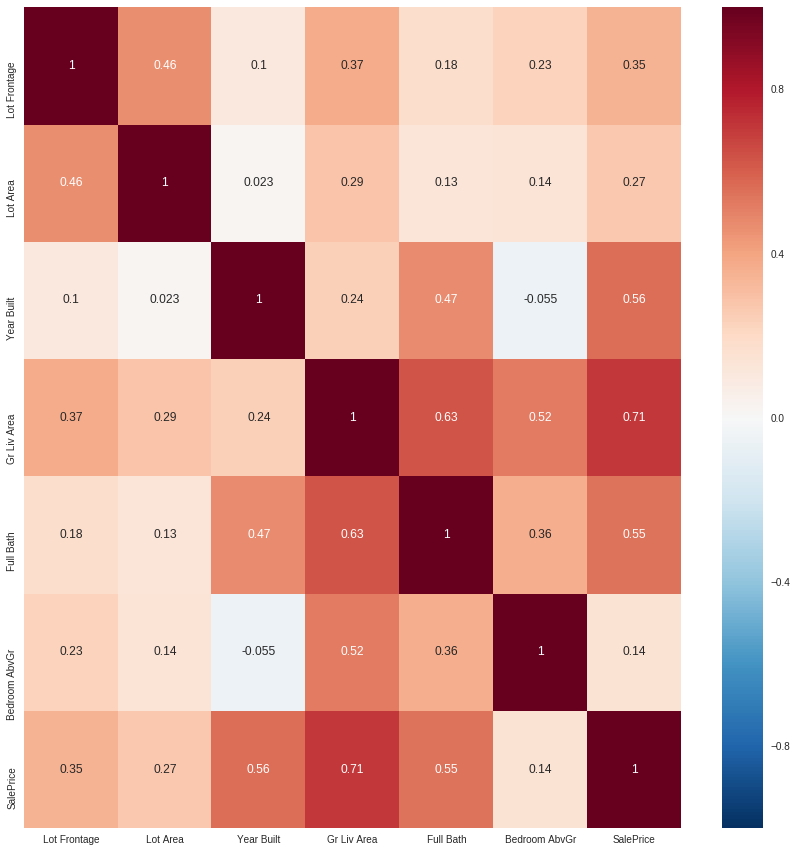

In [0]:
#Make subset of dataset without Garage Types
result_copy = result_imputed.copy()

for col in ['2Types','Attchd','Basment','BuiltIn', 'CarPort', 'Detchd', 'No_Garage']:
    if col in result_copy:
        del result_copy[col]
        
#plot correlation matrix of all numeric variables -- excluding Garage Type
import seaborn as sns

cmap = sns.set(style="darkgrid") 

f, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(result_copy.corr(), cmap=cmap, annot=True)

f.tight_layout()

Above we show the linear correlation between all of the numerical variables in our data set. Since Sales Price is the variable we would want to predict, we are interested in seeing how related the other variables are with it. 

The Living Area was the only highly correlated variable with Sales Price (r=0.71). From this, we suspect that predicted Sales Price of the property would increase as the square footage of Living Area also increases .From a seller's standpoint, it looks like the square footage of the living area of the house is the most important factor overall to predict and set a sales price. 

Year Built and Full Bath were also moderately correlated with Sales Price (r=0.56 and 0.55 respectively). We would expect that an increase in Year Built, meaning newer houses, would increase the predicted Sale Price. Sellers would be pleased by this positive correlation since there was a surge of houses built after the 1990s and they can set higher prices for these houses. It would also be expected that a property with more bathrooms would have a higher predicted Sales Price. 

It is also noteworthy that Living Area and Full Baths are linearly correlated (r=0.63). This makes sense since bigger houses would tend to have more bathrooms. 

Contrary to initial expectations, Lot Frontage and Lot Area were only moderately correlated with sales price (r=0.35 and r=0.27 respectively). It is noteworthy for sellers that the living area of the house is more important than the overall lot area when predicting sales price. 

We also note that there was only a moderate correlation between Lot Frontage and Lot Area (r=0.46). Therefore, Lot Area may not be the strongest predictor for Lot Frontage and we could try to find a better suited predictor for our imputation method if we find that sellers believe that Lot Frontage should be an important predictor for sales price. 

For all other pairings, there does not seem to be any strong linear relationships. It is actually a good thing that all other predictor variables are not strongly related to each other because there is less risk of multicollinearity in a model on Sales Price built with these variables.



**Living Area vs Sales Price**

Text(0.5,1,'Sales Price vs Living Area(by # of Bathrooms)')

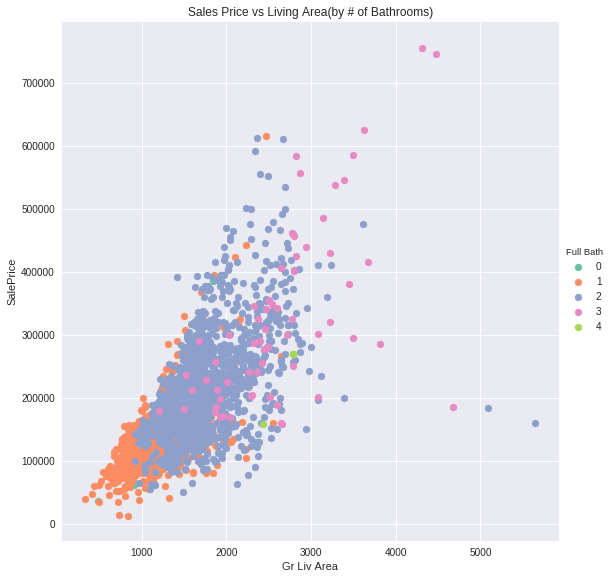

In [0]:
#Plot living area vs sales price, color by 'Full Bath'
plt.figure(figsize=(4,4))
g = sns.FacetGrid(result_imputed, hue='Full Bath', size=8,palette="Set2") 
g.map(plt.scatter, 'Gr Liv Area', 'SalePrice').add_legend()  
plt.title("Sales Price vs Living Area(by # of Bathrooms)")


From the matrix scatter and the scatter plot above,  we can see that there exists a linear trend  between the Living Area the the Sales Price of the house. It seems like the bigger the Living Area, the more full bathrooms it has and the house would be more expensive. As the pie chart shown in the section 3.1, we also can  see that most of the houses have 2 full bathrooms, and very few have 3 or 4 full bathrooms. From a sellers standpoint, we would want to obtain more properties with larger Living Area to maximize profits. It is also ideal to strive for properties with greater square footage because those are the ones more likely to have more bathrooms which would be even more profit added.

**Sales Price by Garage Type**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


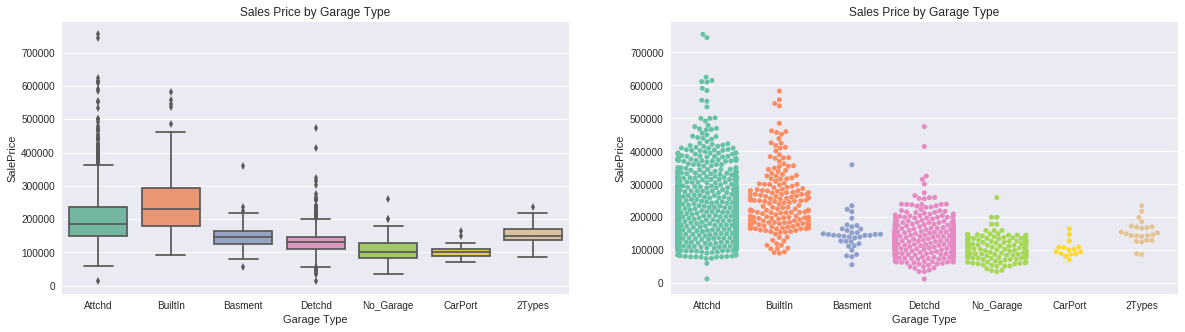

In [0]:
#Sales Price by Garage Type
import seaborn as sns

plt.subplots(figsize=(20, 5))

plt.subplot(1,2,1)
sns.boxplot(x="Garage Type", y="SalePrice", data=result_imputed,palette="Set2")
plt.title('Sales Price by Garage Type')

plt.subplot(1,2,2)
sns.swarmplot(x="Garage Type", y="SalePrice", data=result_imputed,palette="Set2")
plt.title('Sales Price by Garage Type')

plt.show()

Overall, there doesn't appear to be very large differences in sales price for houses with different types of garages. There might be a significant difference in mean sales price between houses with no garage versus houses with attached or built-in garage. Houses with built-in garages have the highest mean sales price, but based on the distribution depicted in the swarm plot, there doesn't seem to be a significant difference between houses with built-in and attached garages, which had the second highest mean sales price. Therefore, it appears that a sales person doesn't have to worry too much about which type of garage a house has in order to price it. Sellers also would not have to worry about losing any profit based on the type of garage that a property has.

**Sales Price by Number of Full Bathrooms**

In [0]:
#Sales Price by number of full bathrooms
import seaborn as sns

plt.subplots(figsize=(20, 5))

plt.subplot(1,2,1)
sns.boxplot(x="Full Bath", y="SalePrice", data=result_imputed, palette="Set2")
plt.title('Sales Price by Full Bath')

plt.subplot(1,2,2)
sns.swarmplot(x="Full Bath", y="SalePrice", data=result_imputed, palette="Set2")
plt.title('Sales Price by Full Bath')

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


As expected, houses with more bathrooms tended to have higher sales prices. We see an increasing trend for 1, 2, and 3 bathrooms. Note that we cannot draw a solid conclusion for 0 and 4 bathrooms since there are very few data points in these categories. If the difference between number of bathrooms is significant, sellers can use this information to ask for a higher price for houses with more bathrooms. 

**Sales Price by Year Built**

In [0]:
#Breaking up 'Year Built' into intervals
result_imputed["Year Built cat"]= pd.cut(result_imputed["Year Built"], bins=[1870, 1900, 1950, 1980, 2010], 
                   labels=['1870-1900', '1901-1950', '1951-1980', '1981-2010'])

result_imputed["Year Built cat"].describe()

count          2930
unique            4
top       1981-2010
freq           1210
Name: Year Built cat, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


Text(0.5,1,'Distribution Sales Price by Year Built')

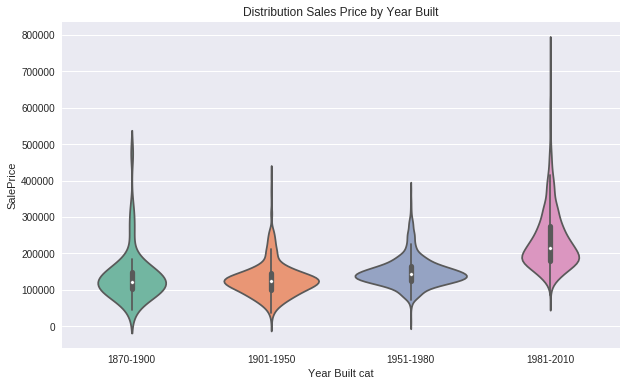

In [0]:
#Sales Price by Year Built
import seaborn as sns
plt.figure(figsize=(10,6))
sns.violinplot( x=result_imputed["Year Built cat"],y=result_imputed["SalePrice"],palette="Set2")
plt.title("Distribution Sales Price by Year Built")

From the Violin Plot shown above, the mean of Sales Price in the group(1981-2010) is larger than the other 3 groups. The long tail of the group(1981-2010) indicates there may exist outliers in the group. It appears that the mean sales price tends to increase for newer houses. Sellers may therefore concentrate on selling newer properties for larger revenue. 

# 4. Exceptional work

##4.1 Explanation of t-SNE dimensionality reduction methods

 t-SNE, or t-Distributed Stochastic Neighbor embedding, is a non-linear dimensionality reduction technique that can be used to visualize high-dimensional datasets. Since it's difficult for us to visualize high-dimensional data, we can use t-SNE to map this data to 2 or more dimensions. t-SNE measures the distances between data points in the high-dimensional space and turns them into conditional probabilities using a normal distribution that represent similarities between points. Then data points are projected onto a low-dimensional space and the similarities between points as conditional probabilities are calculated using a t-distribution. Then t-SNE tries to minimize the difference between conditional probabilities in the high dimensional space and low dimensional space by minimizing the sum of Kullback-Leibler divergence. In this way t-SNE creates a low-dimensional version of the datapoints that closely represent the similarities of the data points in high-dimensional space. 





##4.2 Implement dimensionality reduction using t-SNE, visualization and Interpretion



The TSNE plot shows the visualization of the house dataset in 2 dimensions in our case. The different colors represent number of full baths. From the visualization, we can tell that properties with 1 bathroom tend to be clustered together and properties with 2 bathrooms are clustered for the most part. These two clusters also appear to be separate from each other seeing as there is not much overlap between these groupings in the plot. However, the data points are not clustered perfectly by the classes of the 'Full Bath' in our case, seeing as there are a few clusters with mixed bathroom type. If we want to reduce dimensionality of our dataset, it might be better for us to try other methods or a different classification variable. 

Since the TSNE method may not be the best way to visualize high dimensional dataset in our case, we also implemented dimensionality reduction using PCA. Again, we used different colors to represent the different number of full bathrooms. For our PCA analysis, there are much clearer clusters for properties based on # of Full Baths than what we saw in our TSNE visualization. It appears that the variance of our data can be roughly explained by both component 1 and component 2 since the point are clustered in all directions around the origin. However, principal components 1 and 2 only explain about 40% of the variance, so we would need to add more components to more accurately represent the data. 

In [0]:
#load needed packages
import sklearn as sk
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [0]:
#drop the object variables for Garage Type, Lot Area range, and Year Built range since TSNE is only for numeric variables
#still have Garage Type represented through the one hot encoding
result_tsne=result_imputed.copy()
for col in ['Garage Type', 'Lot_Area_Ranges', 'Year Built cat']:
    if col in result_tsne:
        del result_tsne[col]
      

In [0]:
#categorize "Full Bath" for labeling 
result_tsne["Full Bath"].astype("category")
result_tsne["Full Bath"].unique()

array([1, 2, 3, 0, 4])

In [0]:
result_tsne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 14 columns):
Lot Frontage     2930 non-null float64
Lot Area         2930 non-null float64
Year Built       2930 non-null int64
Gr Liv Area      2930 non-null float64
Full Bath        2930 non-null int64
Bedroom AbvGr    2930 non-null int64
SalePrice        2930 non-null float64
2Types           2930 non-null uint8
Attchd           2930 non-null uint8
Basment          2930 non-null uint8
BuiltIn          2930 non-null uint8
CarPort          2930 non-null uint8
Detchd           2930 non-null uint8
No_Garage        2930 non-null uint8
dtypes: float64(4), int64(3), uint8(7)
memory usage: 180.3 KB


In [0]:
#standardize features in our dataset before performing TSNE

### this code uses the provided graded example for Lab One as a guide ###
### used the code for their PCA analysis (ln 27) as a starting point for our analysis ###

from sklearn import preprocessing
result_scaled=preprocessing.scale(result_tsne)

#get column names for our standardized dataset
names=result_tsne.columns.values

result_scaled=pd.DataFrame(result_scaled,columns=names)
result_scaled.head()

,Lot Frontage,Lot Area,Year Built,Gr Liv Area,Full Bath,Bedroom AbvGr,SalePrice,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,No_Garage
0,3.217650,2.744381,-0.375537,0.309265,-1.024793,0.176094,0.428229,-0.088949,0.832264,-0.111533,-0.260354,-0.071734,-0.603374,-0.237944
1,0.456320,0.187097,-0.342468,-1.194427,-1.024793,-1.032234,-0.948957,-0.088949,0.832264,-0.111533,-0.260354,-0.071734,-0.603374,-0.237944
2,0.501588,0.522814,-0.441674,-0.337718,-1.024793,0.176094,-0.110125,-0.088949,0.832264,-0.111533,-0.260354,-0.071734,-0.603374,-0.237944
3,1.044801,0.128458,-0.110988,1.207523,0.784028,0.176094,0.791305,-0.088949,0.832264,-0.111533,-0.260354,-0.071734,-0.603374,-0.237944
4,0.184714,0.467348,0.848000,0.255844,0.784028,0.176094,0.113980,-0.088949,0.832264,-0.111533,-0.260354,-0.071734,-0.603374,-0.237944


In [0]:
#perform TSNE

### used the TSNE documentation as the basis for this code ###
# http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html #

tsne=TSNE(n_components=2).fit_transform(result_scaled)
tsne


array([[ -2.834091,  40.429226],
       [-20.630367,  47.36611 ],
       [  8.73269 ,  47.573162],
       ...,
       [ 59.602577,  30.81393 ],
       [-20.583113,  43.79626 ],
       [ -0.586769,  -8.452886]], dtype=float32)

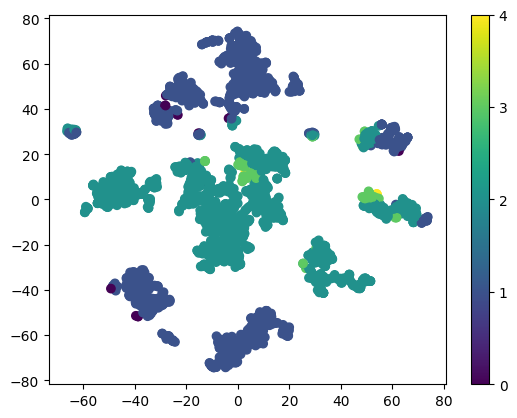

In [0]:
#visualize TSNE results

### used the provided graded example for Lab One (ln 28-29) for how to visualize with scatterplot ###

import matplotlib.pyplot as plt

Y=result_tsne['Full Bath']
lab=result_tsne['Full Bath'].unique()

plt.scatter(x=tsne[:,0],y=tsne[:,1],c=Y)
plt.style.use("default")
plt.colorbar(ticks=range(5))

# source for colorbar: https://stackoverflow.com/questions/42056713/matplotlib-scatterplot-with-legend #

##4.3 Comparison with the PCA method

In [0]:
#compare with pca analysis

### used PCA documentation as basis for this code ###
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html #

pca=PCA(n_components=2)
pca_result=pca.fit_transform(result_scaled)

pca_result



array([[ 1.69240994,  0.12670719],
       [-1.0041941 , -1.60875589],
       [-0.01780367, -0.6880907 ],
       ...,
       [-1.62934069,  0.12355212],
       [-0.18670984, -1.46048091],
       [ 1.48788322, -0.47816954]])

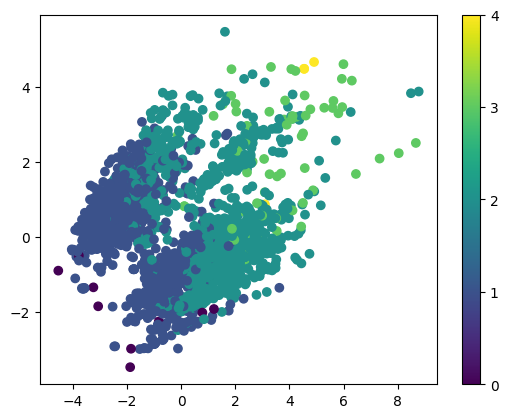

In [0]:
#visualize PCA results

### used the provided graded example for Lab One (ln 28-29) for how to visualize with scatterplot ###

import matplotlib.pyplot as plt

Y=result_tsne['Full Bath']
plt.scatter(x=pca_result[:,0],y=pca_result[:,1],c=Y)
plt.style.use("default")
plt.colorbar(ticks=range(5))

# source for colorbar: https://stackoverflow.com/questions/42056713/matplotlib-scatterplot-with-legend #


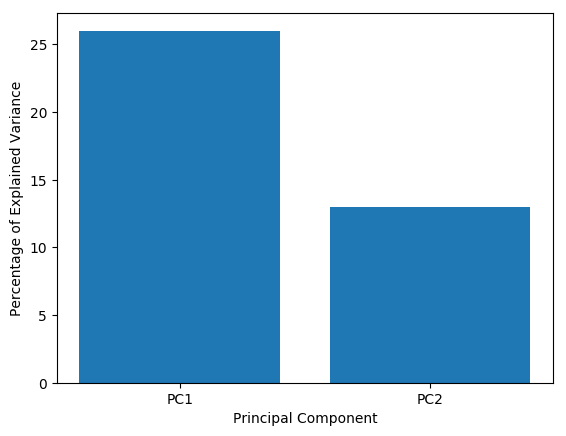

In [0]:
#Source for code: https://www.youtube.com/watch?v=Lsue2gEM9D0

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.show()

**Sources**:

PCA: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

TSNE: http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

TSNE: https://www.analyticsvidhya.com/blog/2017/01/t-sne-implementation-r-python/

Visualizing PCA and TSNE:

https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

https://www.linkedin.com/pulse/dimensionality-reduction-using-tsne-python-deepak-kumar

Visualize with TSNE: https://indico.io/visualizing-with-t-sne/

How to interpret TSNE visualizations: https://distill.pub/2016/misread-tsne/ or https://stats.stackexchange.com/questions/331745/how-to-interpret-t-sne-plot

How to do the scatter plot with colorbar: https://stackoverflow.com/questions/42056713/matplotlib-scatterplot-with-legend*